In [1]:
import os
from os.path import join
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#data load : csv to df
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [3]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
#date column > 6 disit
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

#price > target data(y)
y = train['price']
del train['price']

#id column delete
del train['id']
del test['id']

#train, test concate > data df
data = pd.concat((train, test), axis=0)
print(len(train), len(test),len(data))
data.head()

15035 6468 21503


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


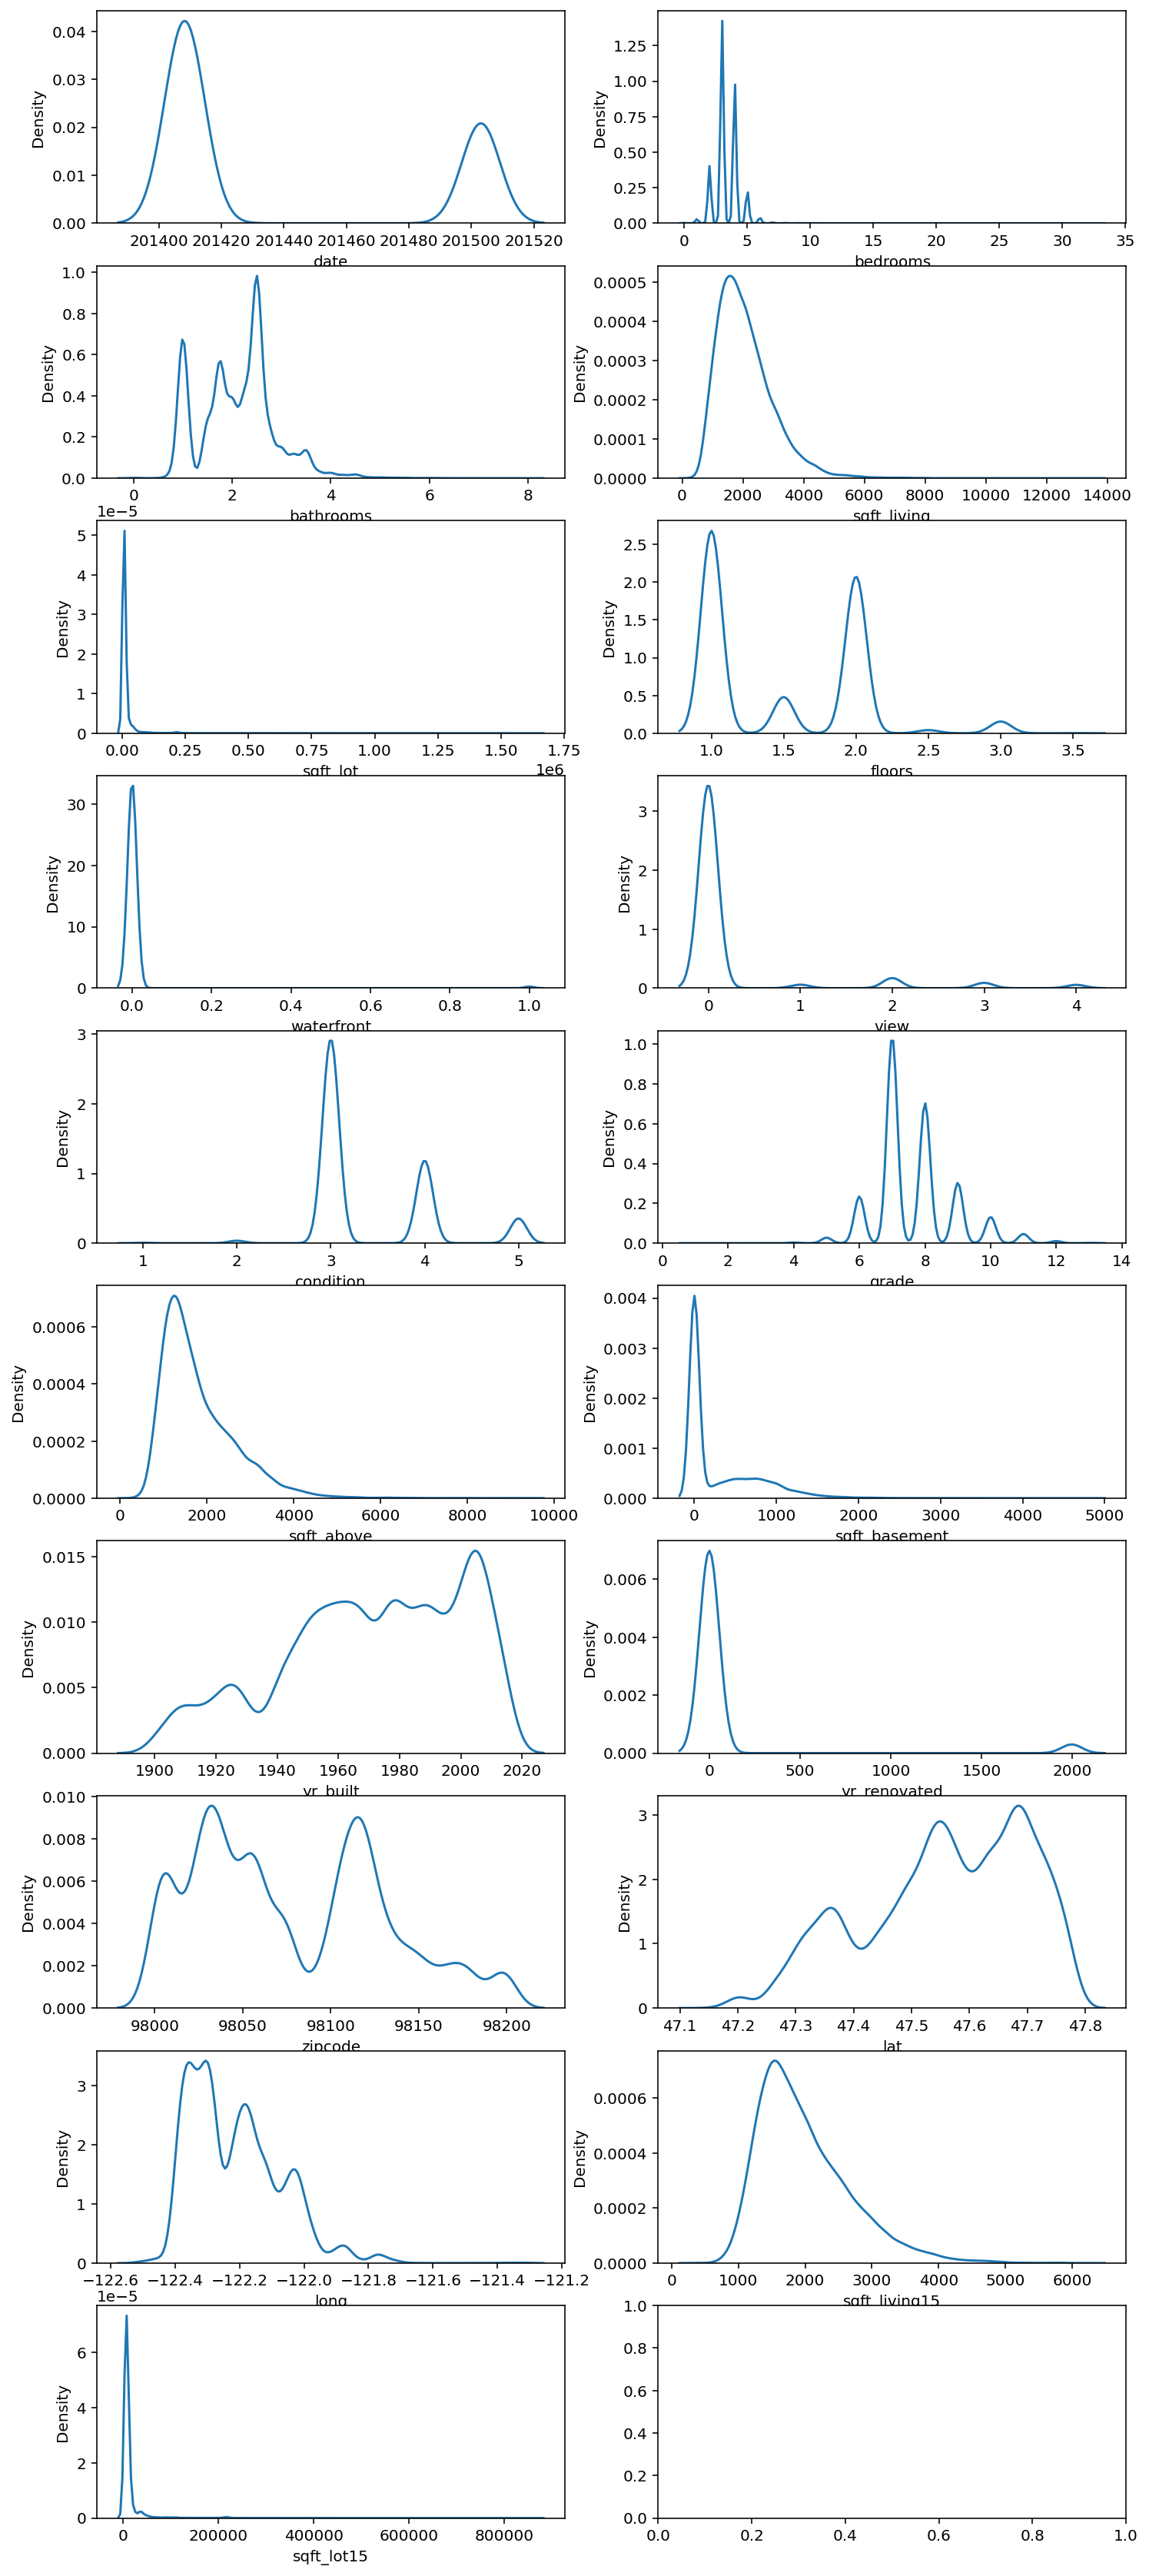

In [5]:
#feature plot
fig, ax = plt.subplots(10, 2, figsize=(12, 30))
count = 0
columns = data.columns
for row in range(10):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        count += 1
        if count == 19 :
            break

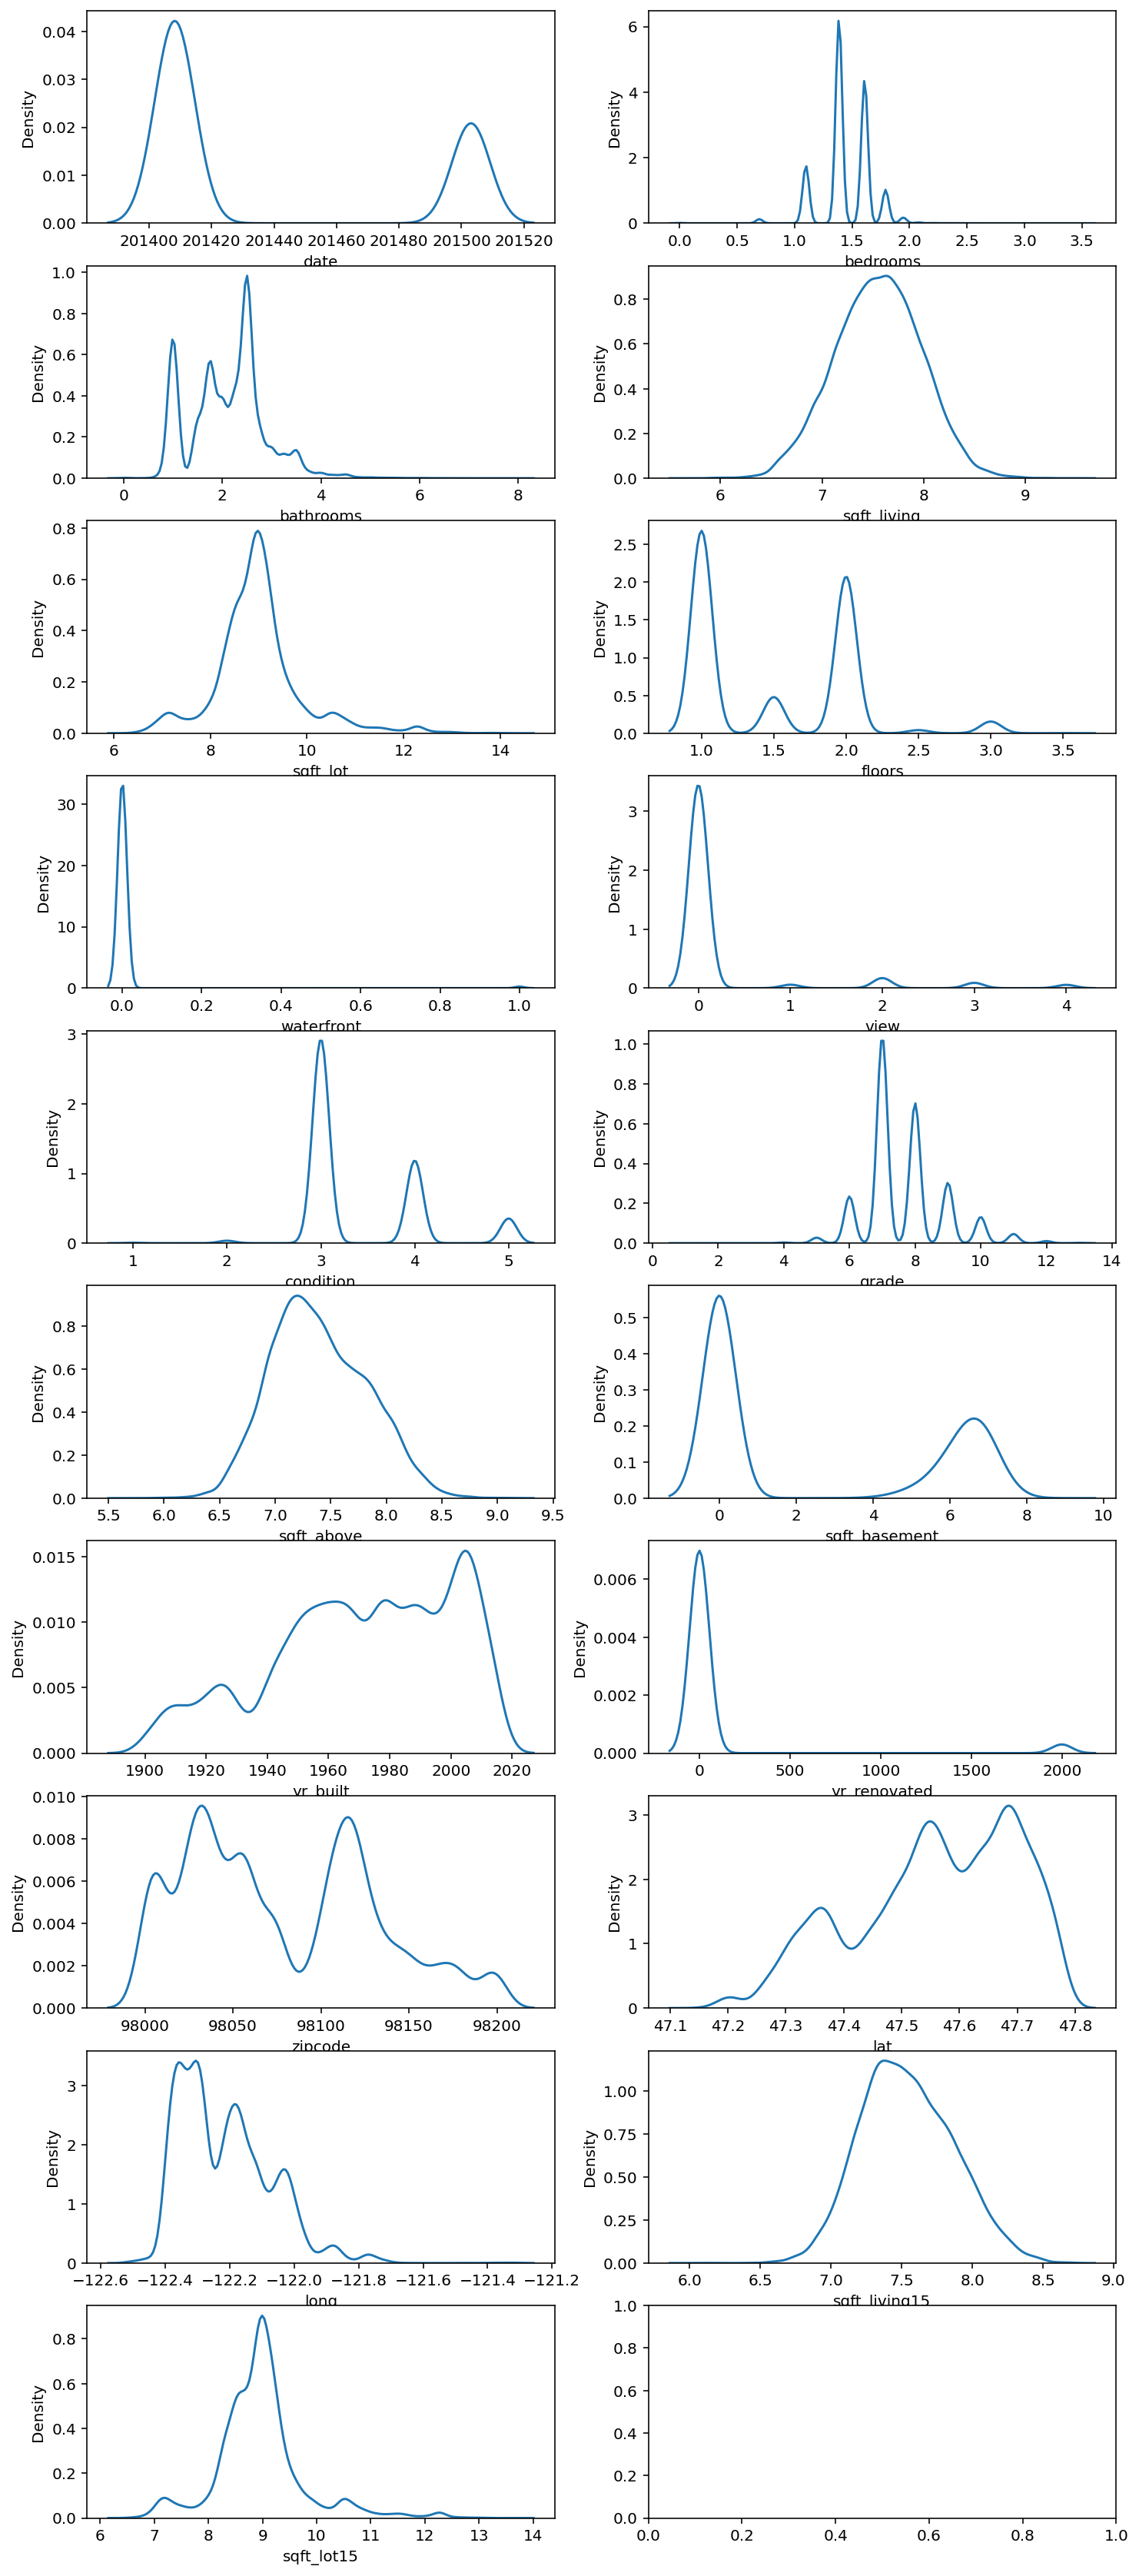

In [6]:
#skew feature log transformation
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement' \
                , 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

fig, ax = plt.subplots(10, 2, figsize=(12, 30))
count = 0
columns = data.columns
for row in range(10):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        count += 1
        if count == 19 :
            break
    
# fig, ax = plt.subplots(4, 2, figsize=(12, 12))
# count = 0
# for row in range(4):
#     for col in range(2):
#         sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
#         count += 1
#         if count == 7:
#             break

<AxesSubplot:xlabel='price', ylabel='Density'>

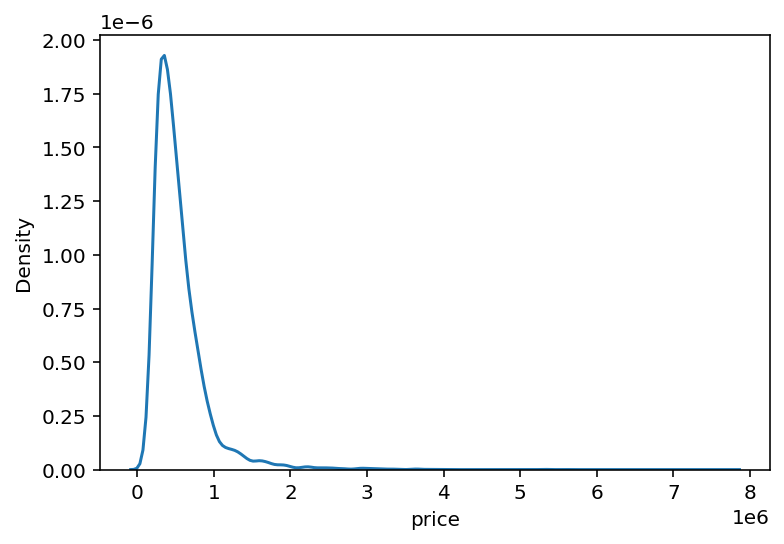

In [7]:
#target plot
sns.kdeplot(y)

<AxesSubplot:xlabel='price', ylabel='Density'>

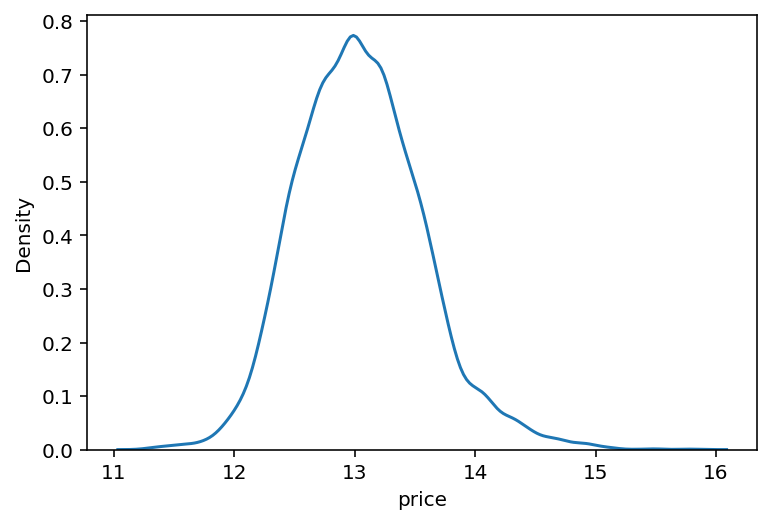

In [8]:
#target log transformation
y_log_trans = np.log1p(y)
sns.kdeplot(y_log_trans)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 6467
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21503 non-null  int64  
 1   bedrooms       21503 non-null  float64
 2   bathrooms      21503 non-null  float64
 3   sqft_living    21503 non-null  float64
 4   sqft_lot       21503 non-null  float64
 5   floors         21503 non-null  float64
 6   waterfront     21503 non-null  int64  
 7   view           21503 non-null  int64  
 8   condition      21503 non-null  int64  
 9   grade          21503 non-null  int64  
 10  sqft_above     21503 non-null  float64
 11  sqft_basement  21503 non-null  float64
 12  yr_built       21503 non-null  int64  
 13  yr_renovated   21503 non-null  int64  
 14  zipcode        21503 non-null  int64  
 15  lat            21503 non-null  float64
 16  long           21503 non-null  float64
 17  sqft_living15  21503 non-null  float64
 18  sqft_lo

In [10]:
#train-sub data split for blending
train_len = len(train)
x = data.iloc[:train_len, :]
sub = data.iloc[train_len:, :]

print(x.shape)
print(sub.shape)
print(len(y))

(15035, 19)
(6468, 19)
15035


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#model list
random_state=2023

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

# train&test model : loss = rmse
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

def get_rmse_scores(models, train, y):
    
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        rmse_scores = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return rmse_scores

#param
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    results = pd.DataFrame(params)
    results['score'] = score
    
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results


from sklearn.ensemble import VotingRegressor

# Define the parameter grids for each model
param_grid_gboost = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

param_grid_xgboost = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

param_grid_lightgbm = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

param_grid_rdforest = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

# Perform grid search for each model
grid_results = {}
best_params = {}

for model in models:
    model_name = model.__class__.__name__
    
    if model_name == 'GradientBoostingRegressor':
        params = param_grid_gboost
    elif model_name == 'XGBRegressor':
        params = param_grid_xgboost
    elif model_name == 'LGBMRegressor':
        params = param_grid_lightgbm
    elif model_name == 'RandomForestRegressor':
        params = param_grid_rdforest
    
    results = my_GridSearch(model, x, y, params, verbose=2, n_jobs=5)
    best_params[model_name] = results.iloc[0].to_dict()
    grid_results[model_name] = results

# Create the average blending model with the best parameters
models_with_best_params = []
weights = []

for model_name, params in best_params.items():
    model = models[model_name]
    model.set_params(**params)
    models_with_best_params.append((model_name, model))
    weights.append(1)  # Equal weights for each model

blending_model = VotingRegressor(estimators=models_with_best_params, weights=weights)

# Fit the blending model
blending_model.fit(x, y)
sub_pred = blending_model.predict(sub)

# Print the predictions for the sub data
print("Sub predictions:", sub_pred)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warni

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
# def get_cv_score(models):
#     kfold = KFold(n_splits=5).get_n_splits(x.values)
#     for m in models:
#         CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
#         print(f"Model: {m['name']}, CV score:{CV_score:.4f}")

# def AveragingBlending(models, x, y, sub_x):
#     for m in models : 
#         m['model'].fit(x.values, y)
    
#     predictions = np.column_stack([
#         m['model'].predict(sub_x.values) for m in models
#     ])
#     return np.mean(predictions, axis=1)

# y_pred = AveragingBlending(models, x, y, sub)
# y_pred

In [ ]:
model.fit(train, y)
prediction = model.predict(test)
prediction = np.expm1(prediction)
pred_df = pd.DataFrame(prediction)
pred_df.head()

In [ ]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

# save_submission(model, train, y, test, 'lgbm', rmsle='0.164399')

In [ ]:
# sub = pd.DataFrame(data={'id':sub_id,'price':y_pred})

In [ ]:
# sub.to_csv('submission.csv', index=False)